In [15]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt , seaborn as sns
from plotly import express as px

In [7]:
df = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

In [8]:
df.head()

id        date    country         store  \
0   0  2017-01-01  Argentina  Kaggle Learn   
1   1  2017-01-01  Argentina  Kaggle Learn   
2   2  2017-01-01  Argentina  Kaggle Learn   
3   3  2017-01-01  Argentina  Kaggle Learn   
4   4  2017-01-01  Argentina  Kaggle Learn   

                                          product  num_sold  
0               Using LLMs to Improve Your Coding        63  
1                   Using LLMs to Train More LLMs        66  
2  Using LLMs to Win Friends and Influence People         9  
3      Using LLMs to Win More Kaggle Competitions        59  
4                      Using LLMs to Write Better        49

In [9]:
df.tail()

id        date country      store  \
136945  136945  2021-12-31   Spain  Kagglazon   
136946  136946  2021-12-31   Spain  Kagglazon   
136947  136947  2021-12-31   Spain  Kagglazon   
136948  136948  2021-12-31   Spain  Kagglazon   
136949  136949  2021-12-31   Spain  Kagglazon   

                                               product  num_sold  
136945               Using LLMs to Improve Your Coding       700  
136946                   Using LLMs to Train More LLMs       752  
136947  Using LLMs to Win Friends and Influence People       111  
136948      Using LLMs to Win More Kaggle Competitions       641  
136949                      Using LLMs to Write Better       539

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   date      136950 non-null  object
 2   country   136950 non-null  object
 3   store     136950 non-null  object
 4   product   136950 non-null  object
 5   num_sold  136950 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.3+ MB


In [12]:
df.describe().T

count          mean           std  min       25%      50%  \
id        136950.0  68474.500000  39534.204020  0.0  34237.25  68474.5   
num_sold  136950.0    165.522636    183.691575  2.0     46.00     98.0   

                75%       max  
id        102711.75  136949.0  
num_sold     184.00    1380.0

In [13]:
df.describe(include='object').T

count unique                                top   freq
date     136950   1826                         2017-01-01     75
country  136950      5                          Argentina  27390
store    136950      3                       Kaggle Learn  45650
product  136950      5  Using LLMs to Improve Your Coding  27390

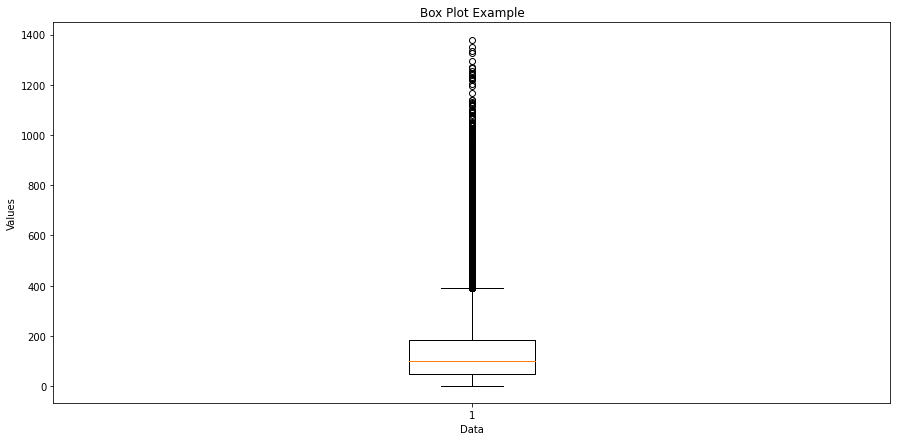

In [20]:
plt.figure(figsize=(15,7))
plt.boxplot(df['num_sold'])

# Add labels and a title
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plot Example')

# Display the plot
plt.show()

In [23]:
def calculate_fences(data, k=1.5):
    # Calculate quartiles
    q1 = np.percentile(data, 25)  # First quartile (25th percentile)
    q3 = np.percentile(data, 75)  # Third quartile (75th percentile)

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Calculate the lower and upper fences
    lower_fence = q1 - k * iqr
    upper_fence = q3 + k * iqr

    return lower_fence, upper_fence


# Call the function and print the results
lower, upper = calculate_fences(df['num_sold'])
print("Lower Fence:", lower)
print("Upper Fence:", upper)

Lower Fence: -161.0
Upper Fence: 391.0


In [24]:
def count_outliers(data, lower_fence, upper_fence):
    outliers = 0
    for value in data:
        if value < lower_fence or value > upper_fence:
            outliers += 1
    return outliers

# Count outliers
num_outliers = count_outliers(df['num_sold'], lower, upper)
print("Number of outliers:", num_outliers)


Number of outliers: 18906


In [26]:
df.shape

(136950, 6)

In [27]:
df['num_sold'] = [value if lower <= value <= upper else upper for value in df['num_sold']]

In [31]:
fig = px.box(df['num_sold'], title="Interactive Box Plot", labels={'value': 'Data'})

# Show the plot
fig.show()


In [32]:
df.describe(include=['O']).T

count unique                                top   freq
date     136950   1826                         2017-01-01     75
country  136950      5                          Argentina  27390
store    136950      3                       Kaggle Learn  45650
product  136950      5  Using LLMs to Improve Your Coding  27390

In [33]:
df['date'] = pd.to_datetime(df['date'])

In [34]:
df.dtypes

id                   int64
date        datetime64[ns]
country             object
store               object
product             object
num_sold           float64
dtype: object

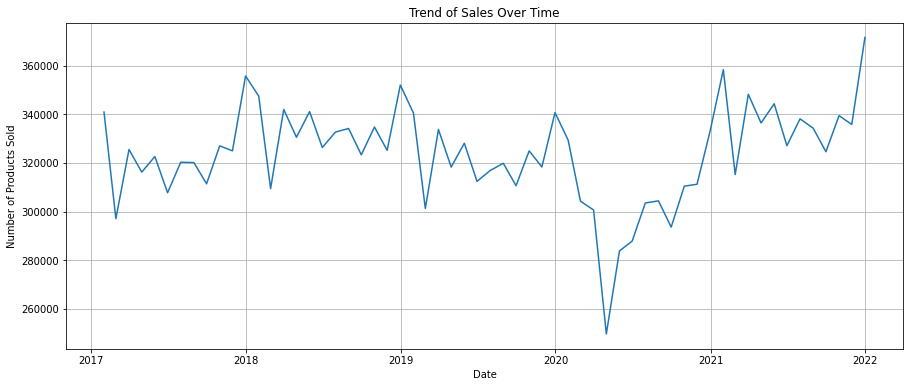

In [38]:
# Aggregate sales on a monthly basis
monthly_sales = df.resample('M', on='date')['num_sold'].sum()

# Plot the trend of sales over time
plt.figure(figsize=(15, 6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.title('Trend of Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Products Sold')
plt.grid(True)
plt.show()

In [41]:
import plotly.graph_objects as go


# Aggregate the sales on a daily basis
daily_sales = df.resample('D', on='date')['num_sold'].sum()

# Create a `plotly.graph_objects.Figure` object
fig = go.Figure()

# Add the sales data to the figure
fig.add_trace(go.Line(x=daily_sales.index, y=daily_sales.values))

# Set the title, x-axis label, and y-axis label
fig.update_layout(title='Trend of Sales Over Time', xaxis_title='Date', yaxis_title='Number of Products Sold')

# Enable interactivity
fig.update_layout(xaxis=dict(rangeselector=dict(visible=True)))

# Show the plot
fig.show()

c:\Users\mahed\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [44]:
daily_sales_rolling_7d = daily_sales.rolling(window=7).mean()
daily_sales_rolling_30d = daily_sales.rolling(window=30).mean()

fig.add_trace(go.Line(x=daily_sales_rolling_7d.index, y=daily_sales_rolling_7d.values))
fig.add_trace(go.Line(x=daily_sales_rolling_30d.index, y=daily_sales_rolling_30d.values))

# Update the figure title
fig.update_layout(title='Trend of Sales Over Time (Rolling Mean)')

# Show the plot
fig.show()

In [48]:
monthly_sales_year = df.resample('M', on='date').sum()['num_sold'].reset_index()

# Create a column for the year
monthly_sales_year['year'] = monthly_sales_year['date'].dt.year

# Create a `plotly.graph_objects.Figure` object
fig = go.Figure()

# Add the sales data to the figure
for year in sorted(monthly_sales_year['year'].unique()):
    year_data = monthly_sales_year[monthly_sales_year['year'] == year]
    if year == 2020:
        fig.add_trace(go.Line(x=year_data['date'].dt.month, y=year_data['num_sold'], name=str(year), line_width=2.5))
    else:
        fig.add_trace(go.Line(x=year_data['date'].dt.month, y=year_data['num_sold'], name=str(year), line_width=0.7))

# Set the title, x-axis label, and y-axis label
fig.update_layout(title='Monthly Sales for Each Year', xaxis_title='Month', yaxis_title='Number of Products Sold')

# Enable interactivity
fig.update_layout(xaxis=dict(rangeselector=dict(visible=True)))

# Show the plot
fig.show()


c:\Users\mahed\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


